# Part II A: Data Cleaning and EDA on Subreddit - Depression_help

In [1]:
import numpy as np
import pandas as pd
import time
import re
import pickle

from wordcloud import WordCloud, STOPWORDS 

from sklearn.feature_extraction import stop_words

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords     # Import the stop word list

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading the data file

In [5]:
df = pd.read_csv('../data/depression_help.csv')
df.shape

(1241, 104)

data has 1241 entries and 104 columns

In [6]:
# Increase the number of columns in display
pd.set_option('display.max_columns', 110)

In [7]:
df.head()

approved_at_utc        subreddit  \
0              NaN  depression_help   
1              NaN  depression_help   
2              NaN  depression_help   
3              NaN  depression_help   
4              NaN  depression_help   

                                            selftext author_fullname  saved  \
0  &amp;#x200B;\n\nhttps://preview.redd.it/8akni1...        t2_xmlxk  False   
1  I really don‚Äôt know... title says it all. I‚Äôm ...     t2_5f0c2d2h  False   
2  As I write this, reddit suggested me to add a ...     t2_4k8usfk9  False   
3  I feel inferior to others, especially my crush...     t2_4qgqls02  False   
4  I struggle with mental health no matter what I...     t2_5j0y7lj5  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   

                                               title  \
0            Immediate Life Support - Discord Server   
1  I learned that 78% of suicides are men and peo...   
2                                    Those dark days   
3          There's nothing interesting to title this   
4          School instantly destroys my mental state   

                          link_flair_richtext subreddit_name_prefixed  hidden  \
0        [{'e': 'text', 't': 'ANNOUNCEMENT'}]       r/depression_help   False   
1   [{'e': 'text', 't': 'REQUESTING ADVICE'}]       r/depression_help   False   
2  [{'e': 'text', 't': 'REQUESTING SUPPORT'}]       r/depression_help   False   
3  [{'e': 'text', 't': 'REQUESTING SUPPORT'}]       r/depression_help   False   
4  [{'e': 'text', 't': 'REQUESTING SUPPORT'}]       r/depression_help   False   

   pwls  link_flair_css_class  downs  hide_score  \
0   NaN                   NaN      0       False   
1   NaN                   NaN      0       False   
2   NaN                   NaN      0        True   
3   NaN                   NaN      0        True   
4   NaN                   NaN      0       False   

                                      media_metadata       name  quarantine  \
0  {'8akni1zthjs31': {'status': 'valid', 'e': 'Im...  t3_dhtwn3       False   
1                                                NaN  t3_etw82o       False   
2                                                NaN  t3_eu7h8f       False   
3                                                NaN  t3_eu8i85       False   
4                                                NaN  t3_etzzxj       False   

  link_flair_text_color author_flair_background_color subreddit_type  ups  \
0                  dark                       #ea0027         public   84   
1                  dark                           NaN         public  152   
2                  dark                           NaN         public    6   
3                  dark                           NaN         public    2   
4                  dark                           NaN         public   27   

   total_awards_received media_embed              author_flair_template_id  \
0                      0          {}  d330ba2e-1513-11e9-826a-0e6296dd7fa6   
1                      0          {}                                   NaN   
2                      0          {}                                   NaN   
3                      0          {}                                   NaN   
4                      0          {}                                   NaN   

   is_original_content user_reports secure_media  is_reddit_media_domain  \
0                False           []          NaN                   False   
1                False           []          NaN                   False   
2                False           []          NaN                   False   
3                False           []          NaN                   False   
4                False           []          NaN                   False   

   is_meta  category secure_media_embed     lin

## 2. Data Cleaning

* `'title'`, `'selftext'` and `'subreddit'` are the columns that will be used for classification, but information from other columns are explored below to have a better understanding of the subreddit structure and contents

### Drop duplicate posts

In [8]:
df.drop_duplicates(subset=['title', 'selftext'], inplace=True)
df.shape

(989, 104)

The number of posts dropped form 1241 to 989.

### Missing entry in `title` and `selftext column`

In [9]:
df.title.isnull().sum()

0

In [10]:
df.selftext.isnull().sum()

99

In [11]:
# What're the posts that don't have selftext?
df[df.selftext.isnull()][['title','selftext']]

title selftext
5                               What is going on here?      NaN
10   20 Surprising Things That Make People With Dep...      NaN
24   Depressed? ‚ÄòExploratory study on the role of e...      NaN
53   Girlfriend couldn't cope with my depression an...      NaN
64                      The dangers of depression NSFW      NaN
..                                                 ...      ...
956                                  My kids got jokes      NaN
972  Sometimes you have to will yourself to have a ...      NaN
974                                    I'm super happy      NaN
976                        Holidays are hard for me to      NaN
988                                    I hate shopping      NaN

[99 rows x 2 columns]

* 99 posts only contain  title, but no selftext.  
* As eventually these two columns will be combined into one single text, the nan will be replaced by a space.

In [12]:
# Capture the post index where selfttext is empty
index = list(df[df.selftext.isnull()][['title','selftext']].index)

In [13]:
df.loc[index][['title','selftext']]

title selftext
5                               What is going on here?      NaN
10   20 Surprising Things That Make People With Dep...      NaN
24   Depressed? ‚ÄòExploratory study on the role of e...      NaN
53   Girlfriend couldn't cope with my depression an...      NaN
64                      The dangers of depression NSFW      NaN
..                                                 ...      ...
956                                  My kids got jokes      NaN
972  Sometimes you have to will yourself to have a ...      NaN
974                                    I'm super happy      NaN
976                        Holidays are hard for me to      NaN
988                                    I hate shopping      NaN

[99 rows x 2 columns]

#### Fill NaN with a space

In [14]:
df['selftext'].fillna(" ", inplace=True)

In [15]:
# To confirm anymore NaN in selftext
df.selftext.isnull().sum()

0

### Look at the column information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 989
Columns: 104 entries, approved_at_utc to author_cakeday
dtypes: bool(26), float64(27), int64(8), object(43)
memory usage: 675.5+ KB


Data type: bool(26), float64(27), int64(8), object(43)

In [17]:
# Find columns that are all null
null_col = [col for col in df.columns if df[col].isnull().sum()==len(df)]
print(len(null_col))
null_col

25


['approved_at_utc',
 'mod_reason_title',
 'pwls',
 'link_flair_css_class',
 'category',
 'approved_by',
 'thumbnail',
 'author_flair_css_class',
 'content_categories',
 'mod_note',
 'wls',
 'removed_by_category',
 'banned_by',
 'likes',
 'suggested_sort',
 'banned_at_utc',
 'view_count',
 'removed_by',
 'num_reports',
 'mod_reason_by',
 'removal_reason',
 'report_reasons',
 'discussion_type',
 'whitelist_status',
 'parent_whitelist_status']

25 of out 43 Object columns are redundant, as all entries are null.

### Look at the numerical columns

In [18]:
df.describe()

approved_at_utc  mod_reason_title      gilded  pwls  \
count              0.0               0.0  989.000000   0.0   
mean               NaN               NaN    0.001011   NaN   
std                NaN               NaN    0.031798   NaN   
min                NaN               NaN    0.000000   NaN   
25%                NaN               NaN    0.000000   NaN   
50%                NaN               NaN    0.000000   NaN   
75%                NaN               NaN    0.000000   NaN   
max                NaN               NaN    1.000000   NaN   

       link_flair_css_class  downs         ups  total_awards_received  \
count                   0.0  989.0  989.000000             989.000000   
mean                    NaN    0.0   11.247725               0.007078   
std                     NaN    0.0   37.220515               0.083874   
min                     NaN    0.0    0.000000               0.000000   
25%                     NaN    0.0    1.000000               0.000000   
50%                     NaN    0.0    2.000000               0.000000   
75%                     NaN    0.0    6.000000               0.000000   
max                     NaN    0.0  665.000000               1.000000   

       category       score  approved_by  thumbnail  author_flair_css_class  \
count       0.0  989.000000          0.0        0.0                     0.0   
mean        NaN   11.247725          NaN        NaN                     NaN   
std         NaN   37.220515          NaN        NaN                     NaN   
min         NaN    0.000000          NaN        NaN                     NaN   
25%         NaN    1.000000          NaN        NaN                     NaN   
50%         NaN    2.000000          NaN        NaN                     NaN   
75%         NaN    6.000000          NaN        NaN                     NaN   
max         NaN  665.000000          NaN        NaN                     NaN   

       content_categories  mod_note       created  wls  removed_by_category  \
count                 0.0       0.0  9.890000e+02  0.0                  0.0   
mean                  NaN       NaN  1.578672e+09  NaN                  NaN   
std                   NaN       NaN  8.285259e+05  NaN                  NaN   
min                   NaN       NaN  1.571103e+09  NaN                  NaN   
25%                   NaN       NaN  1.577985e+09  NaN                  NaN   
50%                   NaN       NaN  1.578660e+09  NaN                  NaN   
75%                   NaN       NaN  1.579365e+09  NaN                  NaN   
max                   NaN       NaN  1.580083e+09  NaN                  NaN   

       banned_by  likes  suggested_sort  banned_at_utc  view_count  \
count        0.0    0.0             0.0            0.0         0.0   
mean         NaN    NaN             NaN            NaN         NaN   
std          NaN    NaN             NaN            NaN         NaN   
min          NaN    NaN             NaN            NaN         NaN   
25%          NaN    NaN             NaN            NaN         NaN   
50%          NaN    NaN             NaN            NaN         NaN   
75%          NaN    NaN             NaN            NaN         NaN   
max          NaN    NaN             NaN            NaN         NaN   

       removed_by  num_reports  mod_reason_by  removal_reason  report_reasons  \
count         0.0          0.0            0.0             0.0             0.0   
mean          NaN          NaN            NaN             NaN             NaN   
std           NaN          NaN            NaN             NaN             NaN   
min           NaN          NaN            NaN             NaN             NaN   
25%           NaN          NaN            NaN             NaN             NaN   
50%           NaN          NaN            NaN             NaN             NaN   
75%           NaN          NaN            NaN             NaN             NaN   
max           NaN          NaN            NaN             NaN             NaN   

     

* Most of the numeric cols have no data (count=0, NaN in all statistics)
* Potential meaningful columns are: `ups`, `created`, `created_utc`, `num_comments`, `num_crossposts`.  They were explored below.

In [19]:
# Create a subset of the df based on interested columns
df[['subreddit','title','selftext','ups','score','num_comments','created','created_utc','num_crossposts','crosspost_parent', 'crosspost_parent_list','is_video','media']].head()

subreddit                                              title  \
0  depression_help            Immediate Life Support - Discord Server   
1  depression_help  I learned that 78% of suicides are men and peo...   
2  depression_help                                    Those dark days   
3  depression_help          There's nothing interesting to title this   
4  depression_help          School instantly destroys my mental state   

                                            selftext  ups  score  \
0  &amp;#x200B;\n\nhttps://preview.redd.it/8akni1...   84     84   
1  I really don‚Äôt know... title says it all. I‚Äôm ...  152    152   
2  As I write this, reddit suggested me to add a ...    6      6   
3  I feel inferior to others, especially my crush...    2      2   
4  I struggle with mental health no matter what I...   27     27   

   num_comments       created   created_utc  num_crossposts crosspost_parent  \
0             0  1.571103e+09  1.571074e+09               0              NaN   
1            41  1.580013e+09  1.579985e+09               0              NaN   
2             2  1.580079e+09  1.580050e+09               0              NaN   
3             1  1.580083e+09  1.580055e+09               0              NaN   
4             5  1.580031e+09  1.580002e+09               0              NaN   

  crosspost_parent_list  is_video media  
0                   NaN     False   NaN  
1                   NaN     False   NaN  
2                   NaN     False   NaN  
3                   NaN     False   NaN  
4                   NaN     False   NaN

In [20]:
df[df.ups != df.score]

# observation: ups and score means the same thing for the data collected

Empty DataFrame
Columns: [approved_at_utc, subreddit, selftext, author_fullname, saved, mod_reason_title, gilded, clicked, title, link_flair_richtext, subreddit_name_prefixed, hidden, pwls, link_flair_css_class, downs, hide_score, media_metadata, name, quarantine, link_flair_text_color, author_flair_background_color, subreddit_type, ups, total_awards_received, media_embed, author_flair_template_id, is_original_content, user_reports, secure_media, is_reddit_media_domain, is_meta, category, secure_media_embed, link_flair_text, can_mod_post, score, approved_by, author_premium, thumbnail, edited, author_flair_css_class, author_flair_richtext, gildings, content_categories, is_self, mod_note, created, link_flair_type, wls, removed_by_category, banned_by, author_flair_type, domain, allow_live_comments, selftext_html, likes, suggested_sort, banned_at_utc, view_count, archived, no_follow, is_crosspostable, pinned, over_18, all_awardings, awarders, media_only, link_flair_template_id, can_gild, spoiler, locked, author_flair_text, visited, removed_by, num_reports, distinguished, subreddit_id, mod_reason_by, removal_reason, link_flair_background_color, id, is_robot_indexable, report_reasons, author, discussion_type, num_comments, send_replies, whitelist_status, contest_mode, mod_reports, author_patreon_flair, author_flair_text_color, permalink, parent_whitelist_status, stickied, url, subreddit_subscribers, created_utc, num_crossposts, media, ...]
Index: []

### When are the messages posted?

* There are 2 columns for time: `created` and `created_utc` 
* Columns `created` and `created_utc` are unix epoch time.  It is the number of seconds that have elapsed since the Unix epoch, that is the time 00:00:00 UTC on 1 January 1970, minus leap seconds.
* `created_utc`: unix time which is in UTC and local unix time - convert this to human readable time

In [21]:
df['created'].map(lambda x:time.ctime(x))

0      Tue Oct 15 09:29:33 2019
1      Sun Jan 26 12:37:41 2020
2      Mon Jan 27 06:42:00 2020
3      Mon Jan 27 08:04:38 2020
4      Sun Jan 26 17:27:11 2020
                 ...           
985    Wed Dec 25 17:28:03 2019
986    Wed Dec 25 16:46:10 2019
987    Wed Dec 25 09:09:55 2019
988    Wed Dec 25 05:36:39 2019
989    Wed Dec 25 10:18:44 2019
Name: created, Length: 989, dtype: object

In [22]:
# Create a column of human - readable time
df['created_time'] = df['created_utc'].map(lambda x:time.ctime(x))

In [23]:
df['created_time'].min(), df['created_time'].max()

('Fri Dec 27 01:29:30 2019', 'Wed Jan 22 23:54:59 2020')

The message was posted between Dec 27 2019 to Jan 22 2020

In [24]:
df.loc[727][['title','created_time']]

title           The holiday season can be hard, sometimes a na...
created_time                             Thu Jan  2 04:06:36 2020
Name: 727, dtype: object

Used post #727 to verify with the website that created_utc coresponds to the time that we see on the webiste posts (Singapore local time).

### Explore the potential columns that help to clean the data
#### 2.1 Remove moderator's messages

In [25]:
df.author_flair_text.astype(str).value_counts()

nan          987
Moderator      2
Name: author_flair_text, dtype: int64

In [26]:
df.distinguished.astype(str).value_counts()

nan          988
moderator      1
Name: distinguished, dtype: int64

In [27]:
df.stickied.value_counts()

False    988
True       1
Name: stickied, dtype: int64

In [28]:
df[df.author_flair_text.notnull()][['title', 'selftext','author', 'author_fullname','distinguished','stickied','author_flair_text']]

title  \
0              Immediate Life Support - Discord Server   
727  The holiday season can be hard, sometimes a na...   

                                              selftext              author  \
0    &amp;#x200B;\n\nhttps://preview.redd.it/8akni1...        TheRecruit4D   
727                                                     XxpillowprincessxX   

    author_fullname distinguished  stickied author_flair_text  
0          t2_xmlxk     moderator      True         Moderator  
727      t2_lhufk18           NaN     False         Moderator

In [29]:
df.loc[0]['selftext']

'&amp;#x200B;\n\nhttps://preview.redd.it/8akni1zthjs31.jpg?width=840&amp;format=pjpg&amp;auto=webp&amp;s=7acbfa2b903ba415b333bc01ece2ca02b77efa66\n\nExperiencing or relate to any of the above? Do you wish to speak to people in a safe, well-moderated online community? [Our Discord server](https://discord.gg/JTGxsjb) offers 1:1 support, off-topic channels to talk with AMAZING people, and chats for mental health.'

In [30]:
df.loc[727][['title','selftext']]

title       The holiday season can be hard, sometimes a na...
selftext                                                     
Name: 727, dtype: object

In [31]:
# Verified with the website that the above entries came from moderators
# Remove them.
df.drop(labels=[0,727], inplace=True)

# verify it's removed
#df.loc[727]  

### Post Categories: not all posts are from help seekers (see below  cells)
* There are posts seeking help
* There are posts providing helps/advice
* **Mis-categorized occurred (people asking for help, but posted under PROVIDING SUPPORT, vice versa)
* After inspecting the different categories, will group NaN, RANT, OTHER and STORY posts as REQUESTING ADVICE/SUPPORT, 
*  That means about 10% of the posts (PROVIDING SUPPORT, PROVIDING ADVICE, INSPIRATION, MOVTIVATION, etc) will be removed for classification.  This is a big amount of posts to remove, but is necessary.

In [32]:
df.link_flair_text.astype(str).value_counts()

REQUESTING ADVICE                  388
REQUESTING SUPPORT                 227
nan                                117
RANT                                91
OTHER                               32
STORY                               32
PROVIDING SUPPORT                   28
PROVIDING ADVICE                    24
INSPIRATION                         23
MOTIVATION                          21
STORY/ADVICE/MOTIVATION              1
uni gives me the heevie jeebies      1
is this normal                       1
OTHER - CALL FOR RESOURCES?          1
Name: link_flair_text, dtype: int64

In [33]:
df.link_flair_text.astype(str).value_counts(normalize=True)

REQUESTING ADVICE                  0.393110
REQUESTING SUPPORT                 0.229990
nan                                0.118541
RANT                               0.092199
OTHER                              0.032421
STORY                              0.032421
PROVIDING SUPPORT                  0.028369
PROVIDING ADVICE                   0.024316
INSPIRATION                        0.023303
MOTIVATION                         0.021277
STORY/ADVICE/MOTIVATION            0.001013
uni gives me the heevie jeebies    0.001013
is this normal                     0.001013
OTHER - CALL FOR RESOURCES?        0.001013
Name: link_flair_text, dtype: float64

In [34]:
df[df.link_flair_text == 'PROVIDING SUPPORT'][['title','selftext', 'link_flair_text']].head()

title  \
21                        Help I don't know what to do   
68   Anyone if anyone is suffering from depression ...   
99   Suicidal thoughts? ** PLEASE WATCH THIS VIDEO ...   
118  Tips to Cope with Depression: A Novice's Guide...   
151                                 A community for us   

                                              selftext    link_flair_text  
21   I have 2 semesters left in college and I've be...  PROVIDING SUPPORT  
68                                                      PROVIDING SUPPORT  
99                                                      PROVIDING SUPPORT  
118  For context I'm a 25F in a highly developed ci...  PROVIDING SUPPORT  
151  Hey guys you may have seen posts from me befor...  PROVIDING SUPPORT

In [35]:
df.loc[21,'selftext']

"I have 2 semesters left in college and I've been married for 5 months. This is the first time I've lived outside of a busy household. My husband works out of town for the week and comes home on the weekend. I am a theatre major who works two jobs and I feel overwhelmed constantly with school. I don't feel good enough or like I want to finish. I have a hard time cleaning and keeping my space organized which I feel bad about when my husband comes home cause he's been gone and I've missed him and I want to make him happy. I feel bad putting this stuff on him cause he has also suffered from depression. I was cutting myself a few months ago but I stopped cause I felt ashamed, instead I've chopped all my hair off which is kinda nice cause I get a lot of compliments. I feel useless and dumb and like I don't need to exist. I don't want to get help cause I am on my parents insurance and I don't want them to know I am depressed. I also just feel ashamed that I might need help. Life feels so dar

#### NaN rows
* Treat nan rows as REQUESTING ADVICE/SUPPORT
* 145 and 158 are duplicate posts

In [36]:
df[df.link_flair_text.isnull()][['title','selftext', 'link_flair_text']].head(20)

title  \
45                                           Hopeless.   
60                                                help   
66        I feel like I'm slipping into a void. Again.   
77                                       Music Therapy   
108                       Depressed personality traits   
119  Do you ever think suicide will ever be acceptable   
125                   Starting a community art gallery   
135                     My roommate won‚Äôt let me sleep   
145                                      Music Therapy   
154                                             So sad   
158                                      Music Therapy   
167     I can‚Äôt feel happy but I don‚Äôt know what to do   
177    Antidepressant Survey for Medical Professionals   
178                  need help doing things/organising   
187  Forgetting teenage years due to drugs/depression?   
189                                  Period Depression   
193                          Life has been pretty shit   
197  How to help a loved one with depression during...   
208   I overthink, get mad easily and I‚Äôm unmotivated.   
209                   HI I'm depressed and unmotivated   

                                              selftext link_flair_text  
45   I can‚Äôt seem to cope with my feelings anymore....             NaN  
60   I don‚Äôt know what to say... I keep seeing her ...             NaN  
66   I felt like hanging myself this morning, the o...             NaN  
77   Please take my Music Therapy survey! I need re...             NaN  
108  For me, whats almost worth than the depression...             NaN  
119  As in will it ever be an option. An easier opt...             NaN  
125  Trying to start a support visual gallery\n\nHe...             NaN  
135  I‚Äôm a first year college student in the univer...             NaN  
145  Please take my Music Therapy survey! I need re...             NaN  
154  Just need someone to talk to tbh. Even if it‚Äôs...             NaN  
158  Please take my Music Therapy Survey! I need re...             NaN  
167  For around a few years I‚Äôd be getting negative...             NaN  
177                                                                NaN  
178  so i recently started a higher dose of meds, a...             NaN  
187  I have trouble remembering my teenage years an...             NaN  
189  Every month this happens, I feel so low I wond...             NaN  
193  Last year 7th September 2019 I had did a attem...             NaN  
197                                                                NaN  
208  Yeah just any advice or even somebody to talk ...             NaN  
209                             Story of my life. Bye.             NaN

In [37]:
df.loc[145]['selftext']

'Please take my Music Therapy survey! I need responses for my AP Research class. Also if you know anyone who‚Äôs also willing to take this survey, it will be greatly appreciated.\nhttps://docs.google.com/forms/d/e/1FAIpQLSdeWQZjwM75JCxIbkM9q2hEFmTbhxGUIgGoaL0OgPxP9hXMOA/viewform?usp=sf_link'

In [38]:
df.loc[158]['selftext']

'Please take my Music Therapy Survey! I need responses for my AP Research class. Also if you know anyone who is willing to do it, it would be greatly appreciated.\nhttps://docs.google.com/forms/d/e/1FAIpQLSdeWQZjwM75JCxIbkM9q2hEFmTbhxGUIgGoaL0OgPxP9hXMOA/viewform?usp=sf_link'

#### RANT rows

In [39]:
df[df.link_flair_text == 'RANT'][['title','selftext', 'link_flair_text']].head()

title  \
46                               Im so pissed and sad   
50                                Emotional Hangovers   
80                      I don‚Äôt know my place anymore   
87                          (nsfw) I‚Äôm just so tired.   
90  I'm pretty sure i could leave at this point an...   

                                             selftext link_flair_text  
46  Recently, my sister got blocked by all her fri...            RANT  
50  That period after an exciting or fun event, th...            RANT  
80  Lately I feel like a background character to e...            RANT  
87  I want to die. But I‚Äôm a coward. I have no dir...            RANT  
90  Im pretty social, but the last year has been t...            RANT

#### PROVIDING ADVICE rows

In [40]:
df[df.link_flair_text == 'PROVIDING ADVICE'][['title','selftext', 'link_flair_text']].head()

title  \
78                  GIVE YOURSELF A PAT ON THE BACK! üëç   
95      If you're scared of meds (effexor/venlafaxine)   
148                                Please make it stop   
174                 I hope this is helpful for someone   
226  If any of you fuckers think someone is faking ...   

                                              selftext   link_flair_text  
78                                                      PROVIDING ADVICE  
95                                                      PROVIDING ADVICE  
148  I hate sleeping cause Everytime I dream I have...  PROVIDING ADVICE  
174  Therapist of 22 years here. I've been reading ...  PROVIDING ADVICE  
226  People at my school go around saying people li...  PROVIDING ADVICE

In [41]:
df.loc[226]['selftext']

'People at my school go around saying people like me are ‚Äúfaking depression‚Äù because it‚Äôs the ‚Äúcool new thing‚Äù. Nobody wants to be depressed you fuckin dick heads. All you cunts are doing when you tell them that they‚Äôre faking it is increasing the chances they are just gonna tie a noose in their basement and hand themselves. So fuckin stop if you do that\n\nThis is a rant/providing advice'

#### STORY and OTHER rows
* There is a mixture of help seeking and none-help seeking posts, but most of the posts are help seeking.
* Consider them as help seeking posts

In [42]:
# show the first 20 STORY or OTHER posts
df[(df.link_flair_text == 'OTHER') |(df.link_flair_text == 'STORY')][['title','selftext', 'link_flair_text']].head(20)

title  \
11                            I'm not good with titles   
14                                  #currentmanicstate   
24   Depressed? ‚ÄòExploratory study on the role of e...   
28                  PBA and Multi Personality Disorder   
32                                I don't know anymore   
41                                Fight to stay active   
79   I actually sobbed while in the shower, I think...   
111                       Thick thighs and heavy sighs   
113  How we dealt with depression.. And how it was ...   
141  What are the new treatment modalities in depre...   
153                    I think i am letting myself die   
190                           I'm slowly getting worse   
210                                Just need an outlet   
216                               I‚Äôve lost my sparkle   
219                         Addicted to choking myself   
225  Do I still have depression even if I don‚Äôt act...   
227                                       What a year.   
256                                           Relapse?   
300  As a Christian, this song helped me go through...   
303                                     My resignation   

                                              selftext link_flair_text  
11   Everyone today is my grandmothers birthday and...           STORY  
14   Current manic state: Halsey, dying my hair and...           STORY  
24                                                               OTHER  
28   Please I think i need help i have multiple per...           OTHER  
32   Highschool has been rough for me, but this sch...           STORY  
41   Trust me, I'm not technically qualified to giv...           STORY  
79   I don't know why I'm writing this, this is my ...           STORY  
111  My first post. \nI am incredibly depressed and...           STORY  
113  Disclaimer: I'm posting this for a friend who ...           STORY  
141                                                              OTHER  
153  I have had depression for 8 years. So most of ...           STORY  
190  No matter how happy I try to get, the depressi...           OTHER  
210  I‚Äôve felt very alone for months... I don‚Äôt rea...           STORY  
216  I feel like I‚Äôm just passing by the minutes of...           STORY  
219  Its all coming to an end. I took out a life in...           STORY  
225  I just made an account for this, so I‚Äôm still ...           OTHER  
227  Over the past year or so has been shit to say ...           STORY  
256  So hi .. not really sure how this will help bu...           OTHER  
300                                                              OTHER  
303  I‚Äôm a 23 year old male who was diagnosed with ...           STORY

In [43]:
# Look at one of the STORY post
df.loc[303]['selftext']

'I‚Äôm a 23 year old male who was diagnosed with major depressive disorder and anxiety a couple of years ago., and recently I was diagnosed with panic disorder. I‚Äôve been on medication for quite some time now and I‚Äôve been able to manage things up until late. I‚Äôve been working for this big company for about 4 months now and had nothing but good experiences throughout.\n\nLast week I experienced my first panic attack. It was a ride. These attacks went on for days. And once I was able to see my doctor we found out that I had panic disorder, and that my depression and anxiety were contributing to the development of this new disorder. We discussed what I‚Äôve been experiencing and she advised me to resign from work. I decided not to do that and try to work on and power through it, but it only made things worse. \n\nFast forward to today, I decided to resign from my company because my conditions were getting in the way of me being able to do the work that was expected of me, and it‚Äô

#### Remove posts that are not seeking seeking help

In [44]:
df = df[(df.link_flair_text == 'REQUESTING ADVICE')|
        (df.link_flair_text == 'REQUESTING SUPPORT')|
        (df.link_flair_text.isnull())|
        (df.link_flair_text == 'RANT')|
        (df.link_flair_text == 'OTHER')|
        (df.link_flair_text == 'STORY')]
df.shape

(887, 105)

### Crossposts
Summary:
* 3 columns were looked into: num_crossposts, crosspost_parent_list and crosspost_parent
* num_crossposts is to track the number of posts that get posted again.
* crosspost_parent_list and crosspost_parent are the ones that indicate if a post is a crosspost - remove these posts to avoid duplicates

In [45]:
df.num_crossposts.value_counts()

0    880
1      7
Name: num_crossposts, dtype: int64

In [46]:
df[df.num_crossposts != 0]

approved_at_utc        subreddit  \
34               NaN  depression_help   
57               NaN  depression_help   
144              NaN  depression_help   
482              NaN  depression_help   
489              NaN  depression_help   
527              NaN  depression_help   
780              NaN  depression_help   

                                              selftext author_fullname  saved  \
34   After almost a decade of therapy and meds, I‚Äôm...     t2_5hva79jt  False   
57   my birthday is in a couple of days and I‚Äôve be...     t2_4jk5nytf  False   
144  I should be over the moon. I should be extreme...     t2_353wye46  False   
482  tl;dr\n\nDepression physically rewires your br...     t2_4evosx3f  False   
489                                                         t2_ufl0cdt  False   
527  What you think about when you go to sleep or w...     t2_4pftwrmy  False   
780  I was hit by a drunk driver in November. I got...      t2_rnmrjmv  False   

     mod_reason_title  gilded  clicked  \
34                NaN       0    False   
57                NaN       0    False   
144               NaN       0    False   
482               NaN       0    False   
489               NaN       0    False   
527               NaN       0    False   
780               NaN       0    False   

                                                 title  \
34                             Alternative Treatments?   
57                                        I‚Äôm just sad   
144                                 Continuous circle.   
482  Depression physically rewires your brain. Any ...   
489                            How are you? "I'm fine"   
527                       What is your 'happy place' ?   
780                 I think I have genuine depression.   

                            link_flair_richtext subreddit_name_prefixed  \
34   [{'e': 'text', 't': 'REQUESTING SUPPORT'}]       r/depression_help   
57   [{'e': 'text', 't': 'REQUESTING SUPPORT'}]       r/depression_help   
144   [{'e': 'text', 't': 'REQUESTING ADVICE'}]       r/depression_help   
482   [{'e': 'text', 't': 'REQUESTING ADVICE'}]       r/depression_help   
489                                          []       r/depression_help   
527   [{'e': 'text', 't': 'REQUESTING ADVICE'}]       r/depression_help   
780  [{'e': 'text', 't': 'REQUESTING SUPPORT'}]       r/depression_help   

     hidden  pwls  link_flair_css_class  downs  hide_score media_metadata  \
34    False   NaN                   NaN      0       False            NaN   
57    False   NaN                   NaN      0       False            NaN   
144   False   NaN                   NaN      0       False            NaN   
482   False   NaN                   NaN      0       False            NaN   
489   False   NaN                   NaN      0       False            NaN   
527   False   NaN                   NaN      0       False            NaN   
780   False   NaN                   NaN      0       False            NaN   

          name  quarantine link_flair_text_color  \
34   t3_etli9u       False                  dark   
57   t3_et2ja9       False                  dark   
144  t3_es022l       False                  dark   
482  t3_emm08i       False                  dark   
489  t3_emb4ux       False                  dark   
527  t3_em0zgr       False                  dark   
780  t3_eia125       False                  dark   

    author_flair_background_color subreddit_type  ups  total_awards_received  \
34                            NaN         public    3                      0   
57                            NaN         public    9                      0   
144                           NaN         public    6                      0   
482                           NaN         public   30                      0   
489                           NaN         public  112                      0   
527                           NaN         public   10                      0   
780                     

In [47]:
df.loc[34]['permalink']

'/r/depression_help/comments/etli9u/alternative_treatments/'

* Permalink was verified on the website, from what is seen `num_crossposts` is to track the number of posts that get posted again in another subreddit.

In [48]:
print(df[df['crosspost_parent_list'].notnull()].shape)
print(df[df['crosspost_parent'].notnull()].shape)

(13, 105)
(13, 105)


In [49]:
df[(df['crosspost_parent'].notnull())&(df['crosspost_parent_list'].notnull())].shape

(13, 105)

* Confirmed that if `crosspost_parent` of a post is not null,  `crosspost_parent_list` is not null either.
* 22 posts in total.

In [50]:
df.loc[53]['crosspost_parent_list']

'[{\'approved_at_utc\': None, \'subreddit\': \'depression\', \'selftext\': "Literally broke up with me yesterday, we\'re both in shambles over it. She was the one to get me to admit to my decade long depression and kept trying to motivate me. I\'ve been halfassing attempts at leading a normal life with her for 2 years, but I kept sinking back into it, doing nothing all day, not entertaining her or me, killing my sexdrive with masturbation and playing videogames without joy.\\n\\nLast sunday she told me there was a person at her university that she liked and who radiates all the things I am not: is generally happy, talkative, travels and shares her interests. I feel so shitty for this, but I immediatly picked up my slack. Made an appointment with a psychotherapist, started running errands I have avoided for ages, went to sign up for sports and was trying to keep myself busy. I thought I could turn this around at the last second, show her that I care and that I want to change. She ended 

* `crosspost_parent_list` shows the original post. Confirmed that the these posts are cross-posts

#### Remove Crossposts

In [51]:
df = df[df['crosspost_parent'].isnull()]
df.shape

(874, 105)

887 - 13 = 874

### Whare are the video and media posts?

In [52]:
df.is_video.value_counts()

False    868
True       6
Name: is_video, dtype: int64

In [53]:
df.media.astype(str).value_counts()

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             862
{'type': 'youtube.com', 'oembed': {'provider_url': 'https://www.youtube.com/', 'version': '1.0', 'title': 'Holy Darkness', 'type': 'video', 'thumbnail_width': 480, 'height': 344, 'width': 459, 'html': '&lt;iframe width="459" height="344" src="https://www.youtube.com/embed/R0K

In [54]:
df[df['is_video'] == True]['media']

327    {'reddit_video': {'fallback_url': 'https://v.r...
469    {'reddit_video': {'fallback_url': 'https://v.r...
489    {'reddit_video': {'fallback_url': 'https://v.r...
956    {'reddit_video': {'fallback_url': 'https://v.r...
976    {'reddit_video': {'fallback_url': 'https://v.r...
988    {'reddit_video': {'fallback_url': 'https://v.r...
Name: media, dtype: object

In [55]:
df[df['media'].notnull()]['media']

243    {'type': 'youtube.com', 'oembed': {'provider_u...
300    {'type': 'youtube.com', 'oembed': {'provider_u...
311    {'oembed': {'provider_url': 'https://www.youtu...
327    {'reddit_video': {'fallback_url': 'https://v.r...
469    {'reddit_video': {'fallback_url': 'https://v.r...
489    {'reddit_video': {'fallback_url': 'https://v.r...
609    {'type': 'youtube.com', 'oembed': {'provider_u...
815    {'type': 'youtube.com', 'oembed': {'provider_u...
822    {'type': 'youtube.com', 'oembed': {'provider_u...
956    {'reddit_video': {'fallback_url': 'https://v.r...
976    {'reddit_video': {'fallback_url': 'https://v.r...
988    {'reddit_video': {'fallback_url': 'https://v.r...
Name: media, dtype: object

In [56]:
df.iloc[469]['selftext']

'I just realized that I have been totally wound up and stressed for the past few days without even realizing and have had trouble sleeping because of it. My mind and body both feel super tight and I can‚Äôt seem to relax enough to be calm/ feel less pressure. I don‚Äôt have anything in particular stressing me so do you guys have a way to let go? Or unwind your head a little? Thank you'

`is_video` is a subset of `media`, there are 12 media files, and it seems that the media link is store inside `media` column.   `title` and `selftext` columns do not contain the url, so cleaning of these 12 posts is not needed

### Save the cleaned data

In [57]:
df.shape

(874, 105)

In [58]:
df.to_csv('../data/depression_cleaned.csv')

### What's the most frequently used word in the subreddit?

#### plot word cloud for selftext

In [59]:
text = " ".join(str(msg) for msg in df.selftext)
print (f"There are {len(text)} words in the combination of all {len(df.selftext)} review.")

There are 966168 words in the combination of all 874 review.


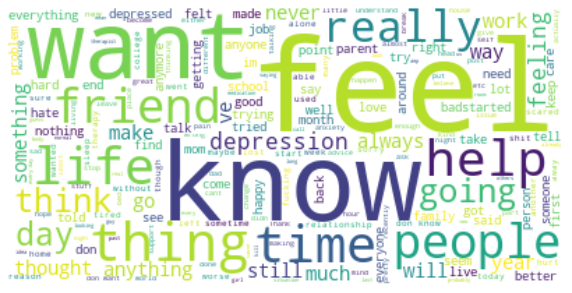

In [60]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["even", "now", 'one'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../images/dh_selftext_wordcloud.png')

Words "feel", "know", "life", "help" "thing", "time" are most mentioned in subtext

#### Plot wordcloud for title

In [61]:
text = " ".join(str(msg) for msg in df.title)
print (f"There are {len(text)} words in the combination of all {len(df.title)} review.")

There are 40193 words in the combination of all 874 review.


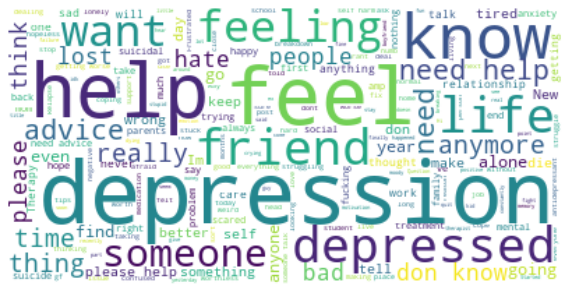

In [62]:
# Create stopword list:
#stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../images/dh_title_wordcloud.png')

Words "depression", "help", "depressed", "feel", "life" are most mentioned in title

## 3. Combine title and selftext into one text

In [63]:
df['comtext'] = df['title'] + " " + df['selftext']
df['comtext'].isnull().sum()

0

In [64]:
# Check if the combined text is done properly with a post
df['comtext'].loc[1]

'I learned that 78% of suicides are men and people who‚Äôve self harmed are 9 times more likely to commit suicide. I‚Äôm worried about myself I really don‚Äôt know... title says it all. I‚Äôm worried I‚Äôll go completely under with no one there for me and lose control of myself'

In [65]:
df.loc[1]['title']

'I learned that 78% of suicides are men and people who‚Äôve self harmed are 9 times more likely to commit suicide. I‚Äôm worried about myself'

In [66]:
df.loc[1]['selftext']

'I really don‚Äôt know... title says it all. I‚Äôm worried I‚Äôll go completely under with no one there for me and lose control of myself'

#### Plot word cloud for comtext

In [67]:
text = " ".join(str(msg) for msg in df.comtext)
print (f"There are {len(text)} words in the combination of all {len(df.comtext)} review.")

There are 1006362 words in the combination of all 874 review.


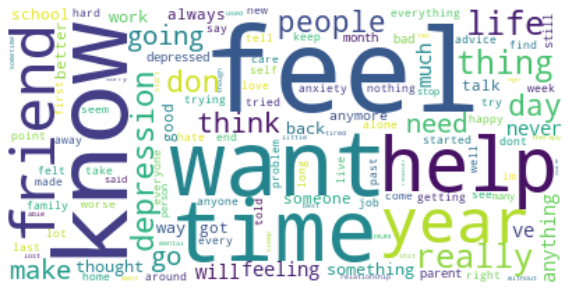

In [68]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["even", "now", 'one'])

# Generate a word cloud image
wordcloud = WordCloud(collocations=False,max_words=120,background_color="white", stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../images/dh_combined_wordcloud.png')

Words "feel", "want", "know", "life", "thing"

## 4. Create a dataframe that contains only the info needed for classification

In [69]:
df_depression = df[['subreddit','comtext']]
df_depression

subreddit                                            comtext
1    depression_help  I learned that 78% of suicides are men and peo...
2    depression_help  Those dark days As I write this, reddit sugges...
3    depression_help  There's nothing interesting to title this I fe...
4    depression_help  School instantly destroys my mental state I st...
6    depression_help  Yeeeah first shower in...a long time! Yeeeah f...
..               ...                                                ...
984  depression_help  Plz help I haven‚Äôt had the best Christmas so f...
985  depression_help  I have a thought of killing myself daily I‚Äôm l...
986  depression_help  am i having anxiety attack? hope this is the r...
988  depression_help                                  I hate shopping  
989  depression_help  I don't know if this is the right place to ask...

[874 rows x 2 columns]

### Pickle the df

In [70]:
filename = '../data/pickled_depression.csv'
pickle.dump(df_depression, open(filename, 'wb'))